## Package Importing

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Importing

In [26]:
crime_in = pd.read_csv('crimedata2.csv')
print(crime_in.shape)
crime_in.head()

(2215, 147)


,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79


## Data initial exploration

In [27]:
# find all "?" in the data set, set them to null and count the number of missing values
crime_in = crime_in.replace('?', np.nan)
crime_in.isnull().sum()

communityname             0
state                     0
countyCode             1221
communityCode          1224
fold                      0
                       ... 
autoTheftPerPop           3
arsons                   91
arsonsPerPop             91
ViolentCrimesPerPop     221
nonViolPerPop            97
Length: 147, dtype: int64

In [28]:
crime_in.head()

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,NaN,NaN,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,NaN,NaN,306.64,NaN
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,NaN,9988.79


(1994, 147)


/var/folders/zp/xzl97jrj4bgfcnnjjm_hk2dc0000gn/T/ipykernel_7647/3402197340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_in_cleaned['ViolentCrimesPerPop'] = (crime_in_cleaned['ViolentCrimesPerPop'].astype(float))


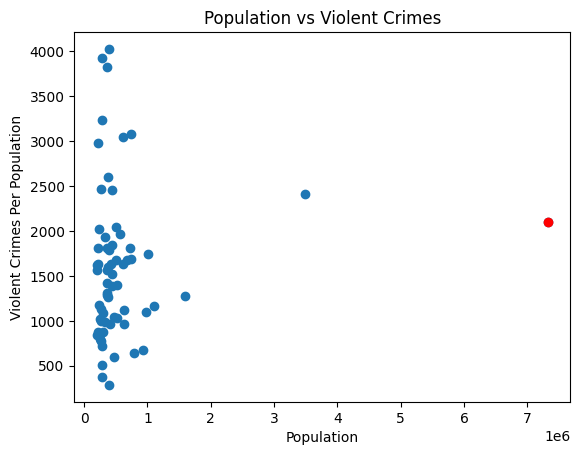

In [29]:
crime_in_cleaned = crime_in.dropna(subset=['ViolentCrimesPerPop'])
print(crime_in_cleaned.shape)
crime_in_cleaned['ViolentCrimesPerPop'] = (crime_in_cleaned['ViolentCrimesPerPop'].astype(float))
crime_in_cleaned = crime_in_cleaned[(crime_in_cleaned['population'] >= 200000)]


# Plot of Violent crime vs population scatter plot but with less data points
plt.scatter(crime_in_cleaned['population'], crime_in_cleaned['ViolentCrimesPerPop'])

charlotte = crime_in_cleaned[crime_in_cleaned['communityname'] == 'NewYorkcity']
plt.scatter(charlotte['population'], charlotte['ViolentCrimesPerPop'], color='red')
# labels for the x axis 
plt.title('Population vs Violent Crimes')
plt.xlabel('Population')
plt.ylabel('Violent Crimes Per Population')
plt.show()

/var/folders/zp/xzl97jrj4bgfcnnjjm_hk2dc0000gn/T/ipykernel_7647/151728382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_in_cleaned['ViolentCrimesPerPop'] = (crime_in_cleaned['ViolentCrimesPerPop'].astype(float))


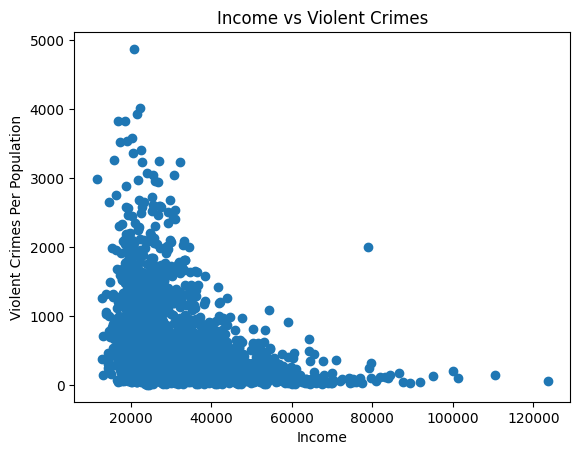

In [30]:
crime_in_cleaned = crime_in.dropna(subset=['ViolentCrimesPerPop'])
crime_in_cleaned['ViolentCrimesPerPop'] = (crime_in_cleaned['ViolentCrimesPerPop'].astype(float))


# Plot of Violent crime vs population scatter plot but with less data points
plt.scatter(crime_in_cleaned['medIncome'], crime_in_cleaned['ViolentCrimesPerPop'])

# labels for the x axis 
plt.title('Income vs Violent Crimes')
plt.xlabel('Income')
plt.ylabel('Violent Crimes Per Population')
plt.show()

/var/folders/zp/xzl97jrj4bgfcnnjjm_hk2dc0000gn/T/ipykernel_7647/1885970020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_in_cleaned['ViolentCrimesPerPop'] = (crime_in_cleaned['ViolentCrimesPerPop'].astype(float))


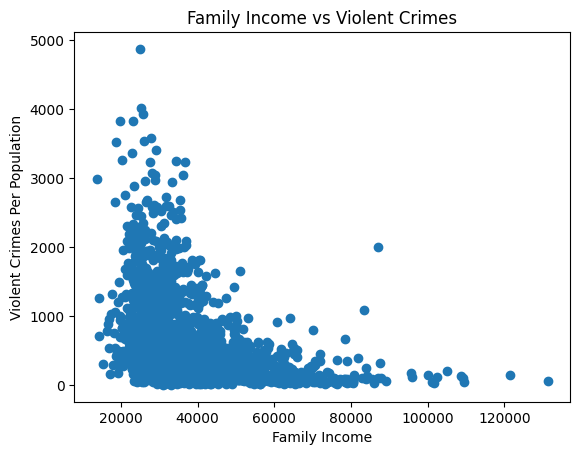

In [31]:
crime_in_cleaned = crime_in.dropna(subset=['ViolentCrimesPerPop'])
crime_in_cleaned['ViolentCrimesPerPop'] = (crime_in_cleaned['ViolentCrimesPerPop'].astype(float))


# Plot of Violent crime vs population scatter plot but with less data points
plt.scatter(crime_in_cleaned['medFamInc'], crime_in_cleaned['ViolentCrimesPerPop'])
# labels for the x axis 
plt.title('Family Income vs Violent Crimes')
plt.xlabel('Family Income')
plt.ylabel('Violent Crimes Per Population')
plt.show()

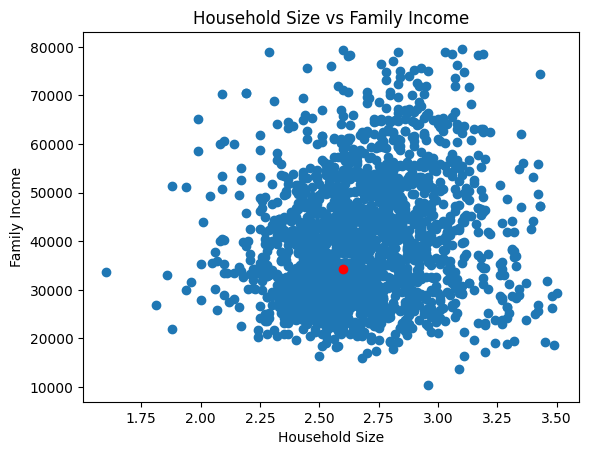

In [32]:
# Plot of Violent crime vs population scatter plot but with less data points
crime_in_cleaned = crime_in[(crime_in['householdsize'] <= 3.5) & (crime_in['medFamInc'] <= 80000)]
plt.scatter(crime_in_cleaned['householdsize'], crime_in_cleaned['medFamInc'])

# add a red dot on the plot for where the communityname is 'Charlottecity'
charlotte = crime_in_cleaned[crime_in_cleaned['communityname'] == 'NewYorkcity']
plt.scatter(charlotte['householdsize'], charlotte['medFamInc'], color='red')
# labels for the x axis 
plt.title('Household Size vs Family Income')
plt.xlabel('Household Size')
plt.ylabel('Family Income')
plt.show()

/var/folders/zp/xzl97jrj4bgfcnnjjm_hk2dc0000gn/T/ipykernel_7647/3692405677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_in_cleaned['ViolentCrimesPerPop'] = (crime_in_cleaned['ViolentCrimesPerPop'].astype(float))


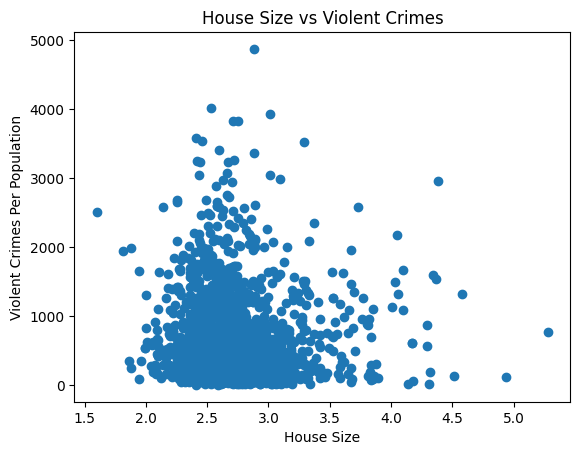

In [33]:
crime_in_cleaned = crime_in.dropna(subset=['ViolentCrimesPerPop'])
crime_in_cleaned['ViolentCrimesPerPop'] = (crime_in_cleaned['ViolentCrimesPerPop'].astype(float))

plt.scatter(crime_in_cleaned['householdsize'], crime_in_cleaned['ViolentCrimesPerPop'])
# labels for the x axis 
plt.title('House Size vs Violent Crimes')
plt.xlabel('House Size')
plt.ylabel('Violent Crimes Per Population')
plt.show()



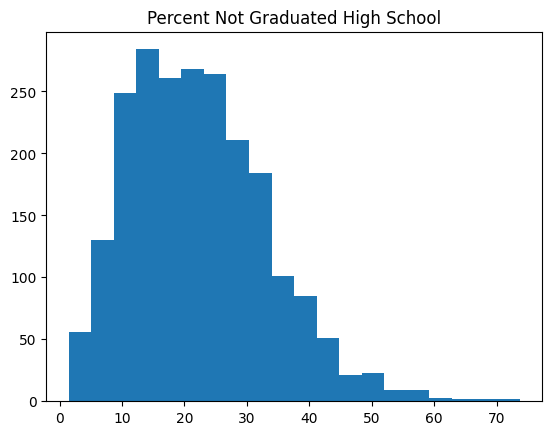

In [34]:
crime_in_cleaned = crime_in.dropna(subset=['PctNotHSGrad'])
crime_in_cleaned['PctNotHSGrad'] = (crime_in_cleaned['PctNotHSGrad'].astype(float))

plt.hist(crime_in_cleaned['PctNotHSGrad'], bins=20)
plt.title('Percent Not Graduated High School')
plt.show()

/var/folders/zp/xzl97jrj4bgfcnnjjm_hk2dc0000gn/T/ipykernel_7647/876005905.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_in_cleaned['ViolentCrimesPerPop'] = (crime_in_cleaned['ViolentCrimesPerPop'].astype(float))


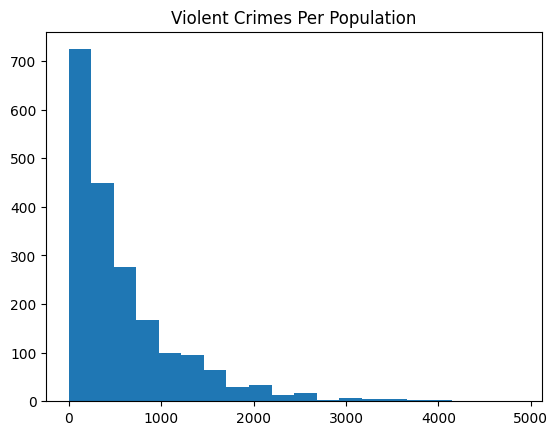

In [35]:
#distrobution of violent crime and nonviolent crime
#drop decimals in violent crimes per population
crime_in_cleaned = crime_in.dropna(subset=['ViolentCrimesPerPop'])
crime_in_cleaned['ViolentCrimesPerPop'] = (crime_in_cleaned['ViolentCrimesPerPop'].astype(float))
plt.hist(crime_in_cleaned['ViolentCrimesPerPop'], bins=20)
plt.title('Violent Crimes Per Population')
plt.show()

/var/folders/zp/xzl97jrj4bgfcnnjjm_hk2dc0000gn/T/ipykernel_7647/248785322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_in_cleaned['nonViolPerPop'] = (crime_in_cleaned['nonViolPerPop'].astype(float))


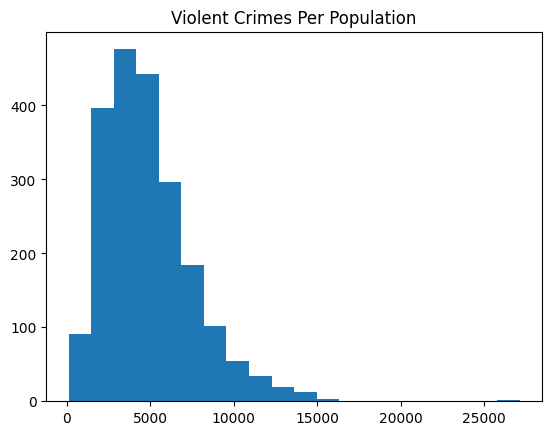

In [36]:
crime_in_cleaned = crime_in.dropna(subset=['nonViolPerPop'])
crime_in_cleaned['nonViolPerPop'] = (crime_in_cleaned['nonViolPerPop'].astype(float))

plt.hist(crime_in_cleaned['nonViolPerPop'], bins=20)
plt.title('Violent Crimes Per Population')
plt.show()

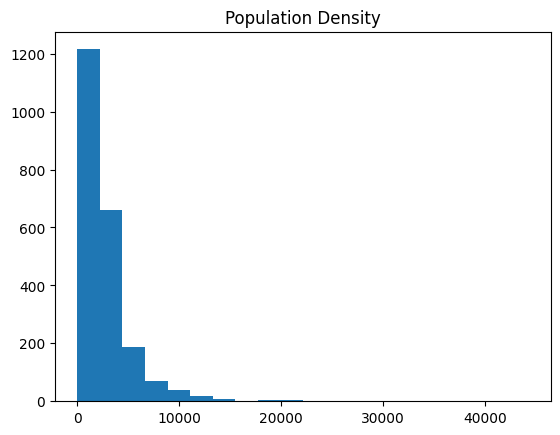

In [37]:
crime_in_cleaned = crime_in.dropna(subset=['PopDens'])
crime_in_cleaned['PopDens'] = (crime_in_cleaned['PopDens'].astype(float))

plt.hist(crime_in_cleaned['PopDens'], bins=20)
plt.title('Population Density')
plt.show()

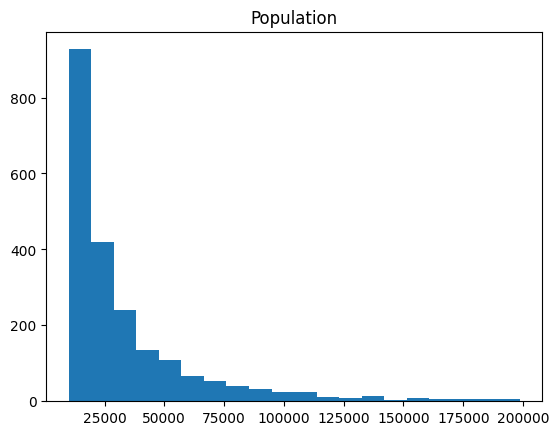

In [38]:
crime_in_cleaned = crime_in.dropna(subset=['population'])
crime_in_cleaned['population'] = (crime_in_cleaned['population'].astype(float))
crime_in_cleaned = crime_in_cleaned[(crime_in_cleaned['population'] <= 200000)]

plt.hist(crime_in_cleaned['population'], bins=20)
plt.title('Population')
plt.show()

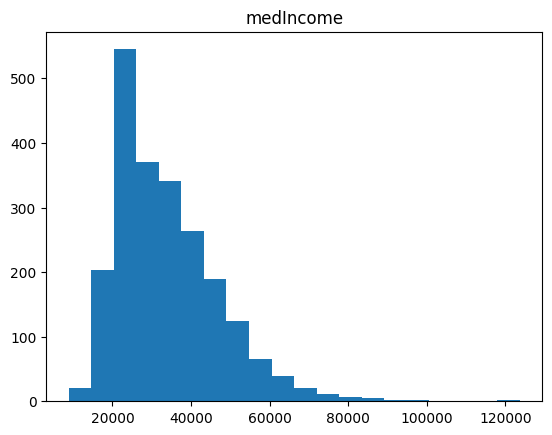

In [39]:
crime_in_cleaned = crime_in.dropna(subset=['medIncome'])
crime_in_cleaned['medIncome'] = (crime_in_cleaned['medIncome'].astype(float))

plt.hist(crime_in_cleaned['medIncome'], bins=20)
plt.title('medIncome')
plt.show()

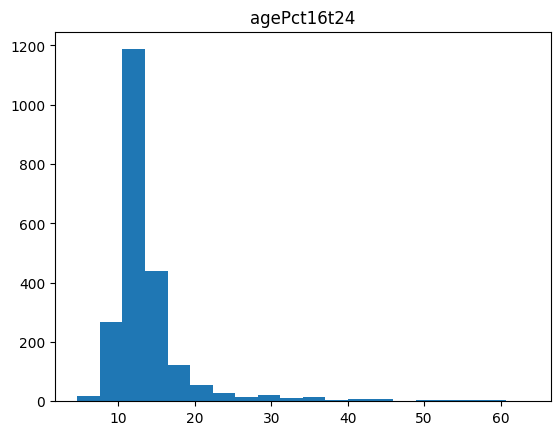

In [40]:
crime_in_cleaned = crime_in.dropna(subset=['agePct16t24'])
crime_in_cleaned['agePct16t24'] = (crime_in_cleaned['agePct16t24'].astype(float))

plt.hist(crime_in_cleaned['agePct16t24'], bins=20)
plt.title('agePct16t24')
plt.show()

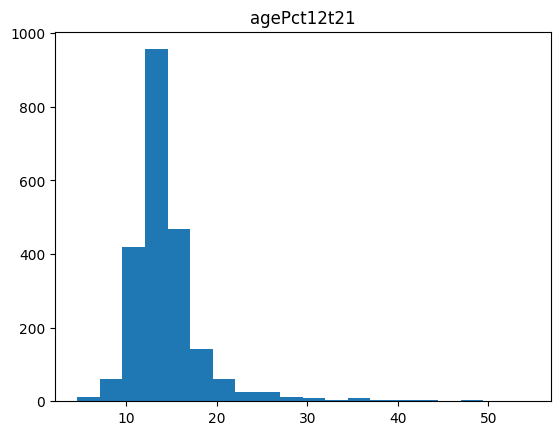

In [41]:
crime_in_cleaned = crime_in.dropna(subset=['agePct12t21'])
crime_in_cleaned['agePct12t21'] = (crime_in_cleaned['agePct12t21'].astype(float))

plt.hist(crime_in_cleaned['agePct12t21'], bins=20)
plt.title('agePct12t21')
plt.show()

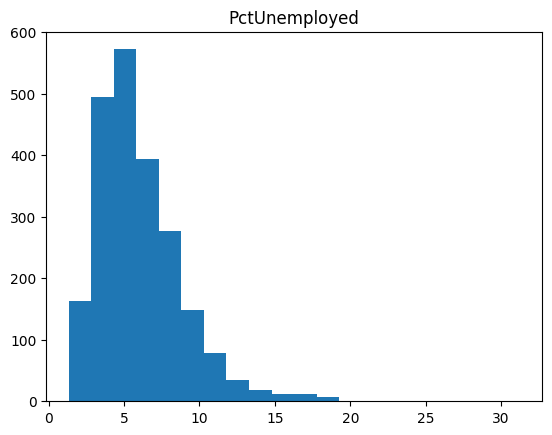

In [42]:
crime_in_cleaned = crime_in.dropna(subset=['PctUnemployed'])
crime_in_cleaned['PctUnemployed'] = (crime_in_cleaned['PctUnemployed'].astype(float))

plt.hist(crime_in_cleaned['PctUnemployed'], bins=20)
plt.title('PctUnemployed')
plt.show()

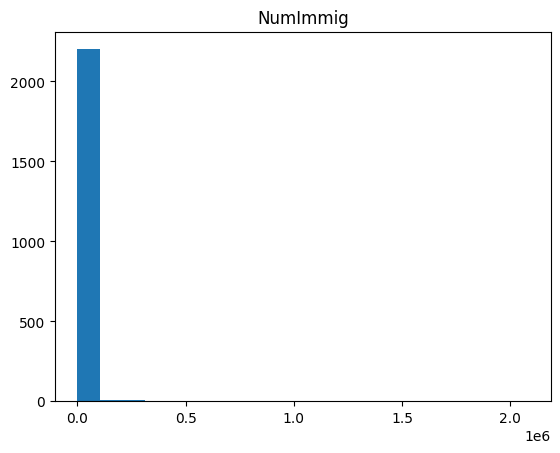

In [43]:
crime_in_cleaned = crime_in.dropna(subset=['NumImmig'])
crime_in_cleaned['NumImmig'] = (crime_in_cleaned['NumImmig'].astype(float))

plt.hist(crime_in_cleaned['NumImmig'], bins=20)
plt.title('NumImmig')
plt.show()

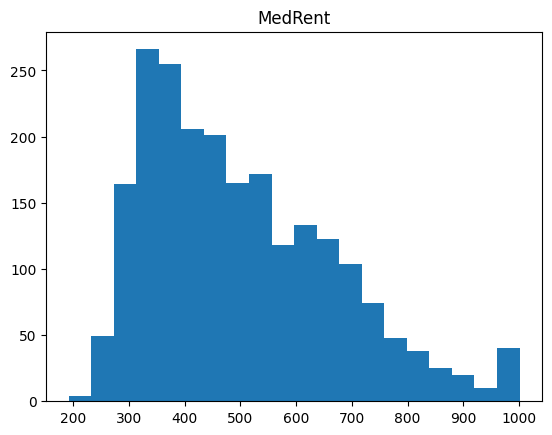

In [44]:
crime_in_cleaned = crime_in.dropna(subset=['MedRent'])
crime_in_cleaned['MedRent'] = (crime_in_cleaned['MedRent'].astype(float))

plt.hist(crime_in_cleaned['MedRent'], bins=20)
plt.title('MedRent')
plt.show()

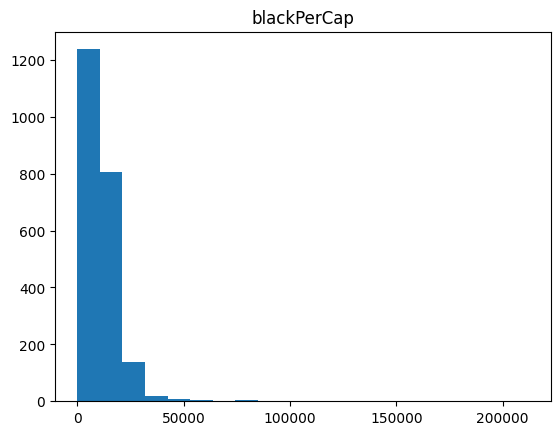

In [45]:
crime_in_cleaned = crime_in.dropna(subset=['blackPerCap'])
crime_in_cleaned['blackPerCap'] = (crime_in_cleaned['blackPerCap'].astype(float))

plt.hist(crime_in_cleaned['blackPerCap'], bins=20)
plt.title('blackPerCap')
plt.show()

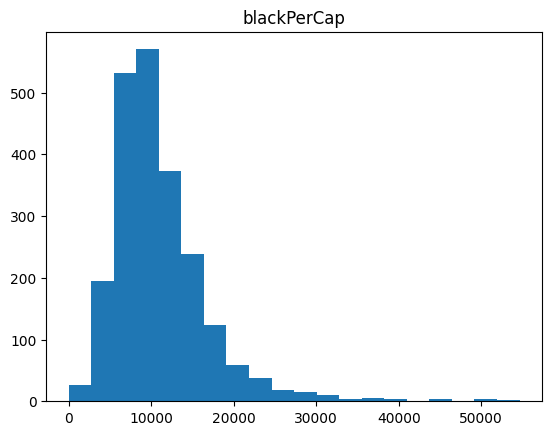

In [46]:

crime_in_cleaned = crime_in.dropna(subset=['HispPerCap'])
crime_in_cleaned['HispPerCap'] = (crime_in_cleaned['HispPerCap'].astype(float))

plt.hist(crime_in_cleaned['HispPerCap'], bins=20)
plt.title('blackPerCap')
plt.show()

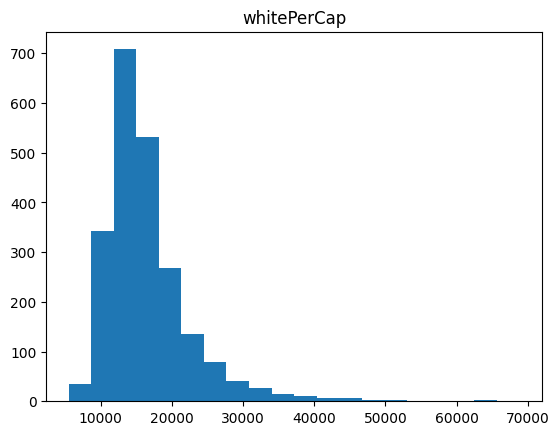

In [47]:

crime_in_cleaned = crime_in.dropna(subset=['whitePerCap'])
crime_in_cleaned['whitePerCap'] = (crime_in_cleaned['whitePerCap'].astype(float))

plt.hist(crime_in_cleaned['whitePerCap'], bins=20)
plt.title('whitePerCap')
plt.show()

In [48]:
# make a clean dataset of all the columns that were used above
crime_clean_set = crime_in.dropna(subset=['ViolentCrimesPerPop', 'population', 'medIncome', 
                                          'medFamInc', 'householdsize', 'PctNotHSGrad', 'nonViolPerPop', 
                                          'PopDens', 'agePct16t24', 'agePct12t21', 'PctUnemployed', 'NumImmig', 
                                          'MedRent', 'blackPerCap', 'HispPerCap', 'whitePerCap'])

crime_clean_set.to_csv('crime_clean_set.csv', index=False)
